In [1]:
!pip install PennyLane

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 51.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 36.8 MB/s eta 0:00:00


In [4]:
import pennylane as qml
import numpy as np

# Codercise I.11.1

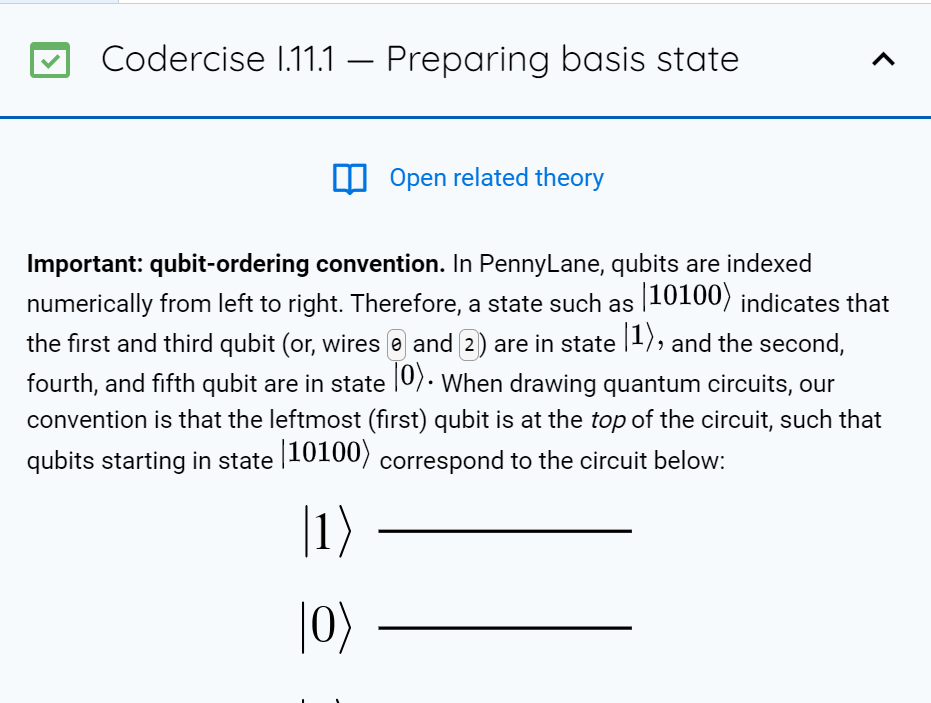

In [5]:
num_wires = 3
dev = qml.device("default.qubit", wires=num_wires)

@qml.qnode(dev)
def make_basis_state(basis_id):
    """Produce the 3-qubit basis state corresponding to |basis_id>.

    Note that the system starts in |000>.

    Args:
        basis_id (int): An integer value identifying the basis state to construct.

    Returns:
        np.array[complex]: The computational basis state |basis_id>.
    """

    ##################
    # YOUR CODE HERE #
    ##################
    states = np.binary_repr(basis_id,width=3)

    j=0
    for i in range(len(states)):
        if states[i] == str(1):
            qml.PauliX(wires=j)
        j+=1

    # CREATE THE BASIS STATE

    return qml.state()

basis_id = 3
print(f"Output state = {make_basis_state(basis_id)}")

Output state = [0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]


## Learnt about the qubit-ordering convention.

# Codercise I.11.2

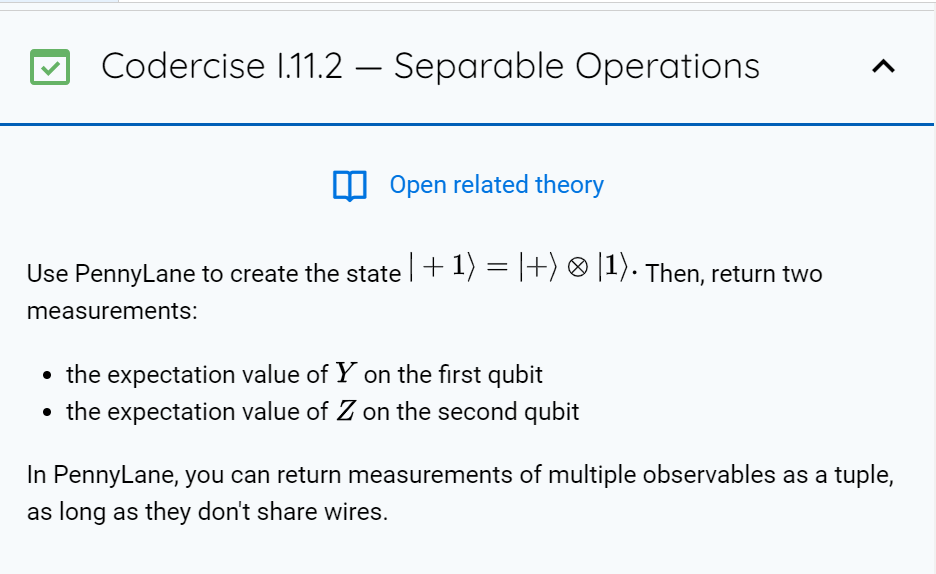

In [6]:
# Creates a device with *two* qubits
dev = qml.device("default.qubit", wires=2)


@qml.qnode(dev)
def two_qubit_circuit():
    ##################
    # YOUR CODE HERE #
    ##################

    # PREPARE |+>|1>
    qml.Hadamard(wires=0)
    qml.X(wires=1)

    # RETURN TWO EXPECTATION VALUES, Y ON FIRST QUBIT, Z ON SECOND QUBIT
    y_val = qml.expval(qml.PauliY(wires=0))
    z_val = qml.expval(qml.PauliZ(wires=1))
    return y_val, z_val


print(two_qubit_circuit())

(tensor(0., requires_grad=True), tensor(-1., requires_grad=True))


## Learnt how to make the above quantum state and return the measurements

# Codercise I.11.3

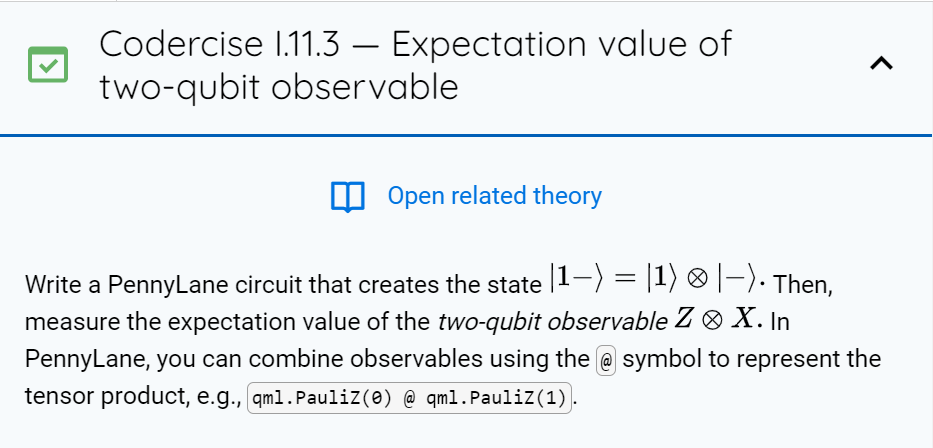

In [7]:
dev = qml.device("default.qubit", wires=2)


@qml.qnode(dev)
def create_one_minus():
    ##################
    # YOUR CODE HERE #
    ##################

    # PREPARE |1>|->
    for i in range(2):
        # print(i)
        qml.PauliX(wires=i)

    qml.Hadamard(wires=1)

    # RETURN A SINGLE EXPECTATION VALUE Z \otimes X

    return qml.expval(qml.PauliZ(wires=0) @ qml.PauliX(wires=1))


print(create_one_minus())

0.9999999999999996


## Learnt how to create the above state and return the combined  observables

# Codercise I.11.4

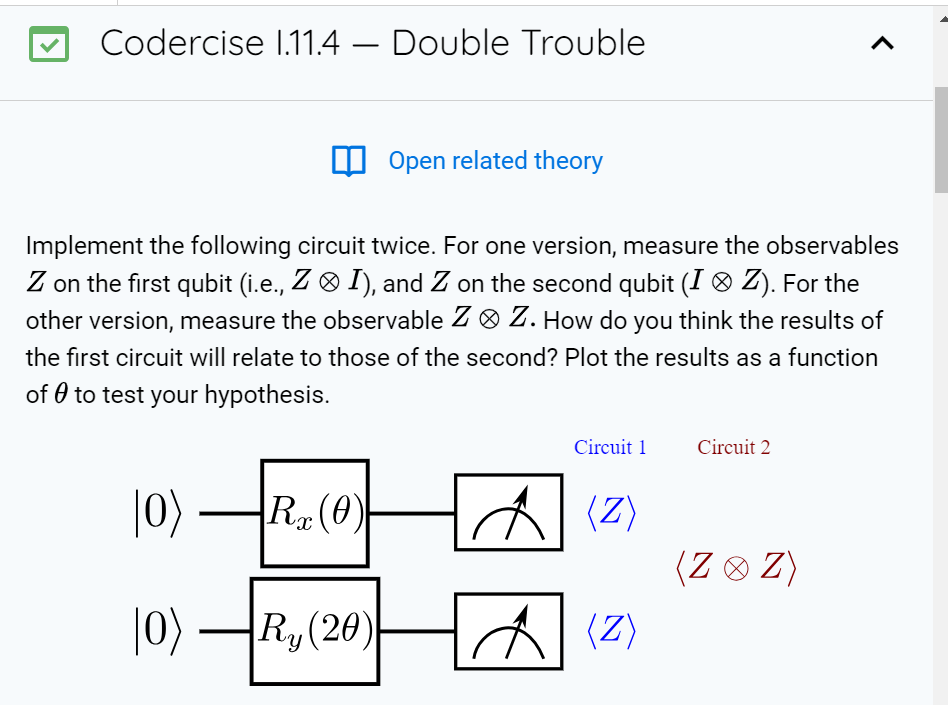

In [9]:
dev = qml.device("default.qubit", wires=2)


@qml.qnode(dev)
def circuit_1(theta):
    """Implement the circuit and measure Z I and I Z.

    Args:
        theta (float): a rotation angle.

    Returns:
        float, float: The expectation values of the observables Z I, and I Z
    """
    ##################
    # YOUR CODE HERE #
    ##################
    qml.RX(theta,wires=0)
    qml.RY(2*theta,wires=1)

    return qml.expval(qml.PauliZ(wires=0)) , qml.expval(qml.PauliZ(wires=1))


@qml.qnode(dev)
def circuit_2(theta):
    """Implement the circuit and measure Z Z.

    Args:
        theta (float): a rotation angle.

    Returns:
        float: The expectation value of the observable Z Z
    """

    ##################
    # YOUR CODE HERE #
    ##################
    qml.RX(theta,wires=0)
    qml.RY(2*theta,wires=1)

    return qml.expval(qml.PauliZ(wires=0) @ qml.PauliZ(wires=1))



def zi_iz_combination(ZI_results, IZ_results):
    """Implement a function that acts on the ZI and IZ results to
    produce the ZZ results. How do you think they should combine?

    Args:
        ZI_results (np.array[float]): Results from the expectation value of
            ZI in circuit_1.
        IZ_results (np.array[float]): Results from the expectation value of
            IZ in circuit_2.

    Returns:
        np.array[float]: A combination of ZI_results and IZ_results that
        produces results equivalent to measuring ZZ.
    """

    combined_results = np.zeros(len(ZI_results))

    ##################
    # YOUR CODE HERE #
    ##################

    return ZI_results * IZ_results


theta = np.linspace(0, 2 * np.pi, 100)

# Run circuit 1, and process the results
circuit_1_results = np.array([circuit_1(t) for t in theta])

ZI_results = circuit_1_results[:, 0]
IZ_results = circuit_1_results[:, 1]
combined_results = zi_iz_combination(ZI_results, IZ_results)

# Run circuit 2
ZZ_results = np.array([circuit_2(t) for t in theta])

# Plot your results
# plot = plotter(theta, ZI_results, IZ_results, ZZ_results, combined_results)

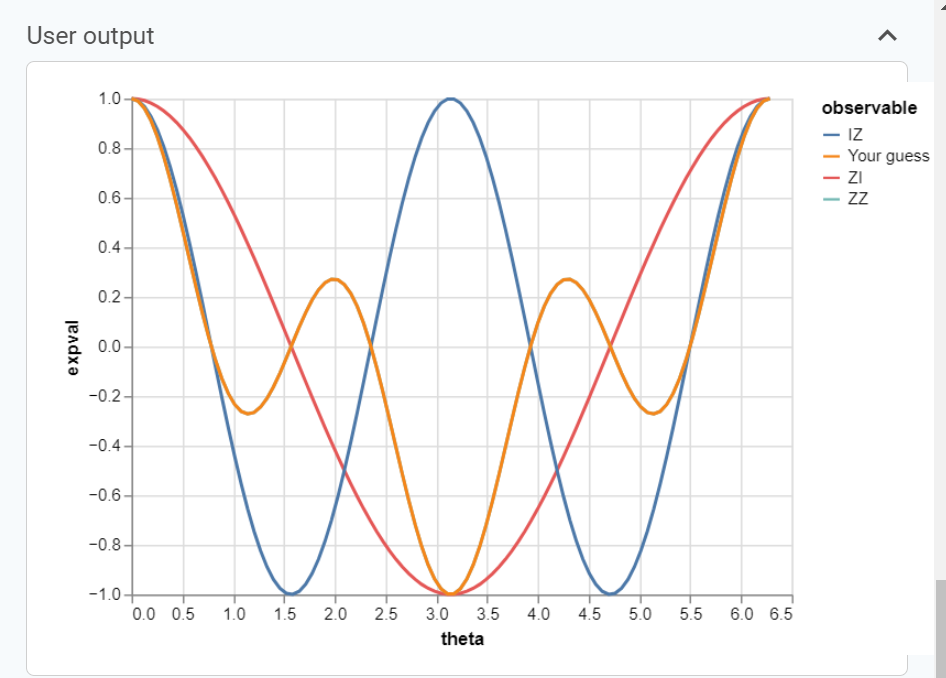

## Learnt about the two versions of the above circuit and plotted the results